Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 2 - Exemplo 3: Gráficos gerados a partir de um dataframe com matplotlib e seaborn

Nome: Wilson Castello Branco Neto

**Dataset**: Gerado artificialmente com os seguintes campos:

1.   Idade
2.   Salário
3.   Função

Importação das bibliotecas necessárias para ler o arquivo do Google Drive, realizar as operações básicas sobre o dataset e gerar gráficos.

Montagem do drive para que o arquivo possa ser encontrado.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Leitura do arquivo CSV, armazenamento dos dados lidos no dataframe do Pandas e apresentação dos valores lidos.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Ciência de Dados/Aula2/Aula2_Exemplos.csv')

df

,Idade,Salário,Função
0,20,4133.73,Programador Jr.
1,48,9982.69,Programador Sr.
2,51,5947.86,Programador Jr.
3,51,7851.60,Cientista de Dados
4,23,5162.67,Programador Sr.
5,40,10326.69,Programador Sr.
6,66,9961.18,Cientista de Dados
7,24,1982.21,Programador Jr.
8,52,9447.06,Cientista de Dados
9,50,7586.70,Programador Jr.


Apresentação dos dados sobre cada atributos (tipo e quantidade de valores não nulos).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Idade    20 non-null     int64  
 1   Salário  20 non-null     float64
 2   Função   20 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 612.0+ bytes


#**Parte 1 - Dados numéricos unidimensionais**

Criação do histograma de frequência para a variável Idade, usando a função hist do matplotlib. Neste exemplo, a série **idades** foi criada a partir de uma das colunas do dataframe. A fórmula de Sturges é usada para definir a quantidade de classes.



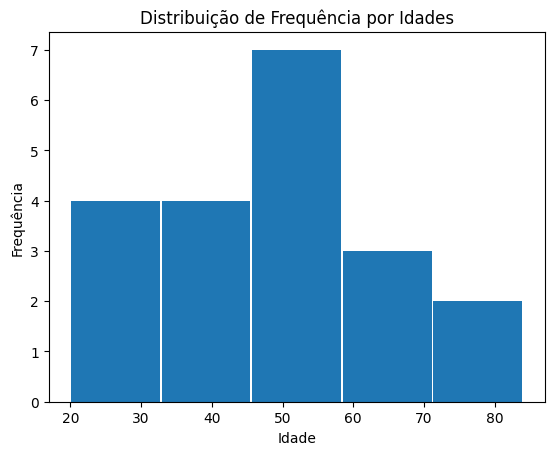

In [ ]:
idades = df['Idade']
#Fórmula de Sturges
classes = int(1 + np.log2(idades.count()))

plt.hist(idades,bins=classes, rwidth=0.98)
plt.title('Distribuição de Frequência por Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Ao passar o valor 'auto' para o parâmetro bins, o histograma será criado com a quantidade de classes maior, entre a fórmula de Sturges e a de Freedman-Diaconis.

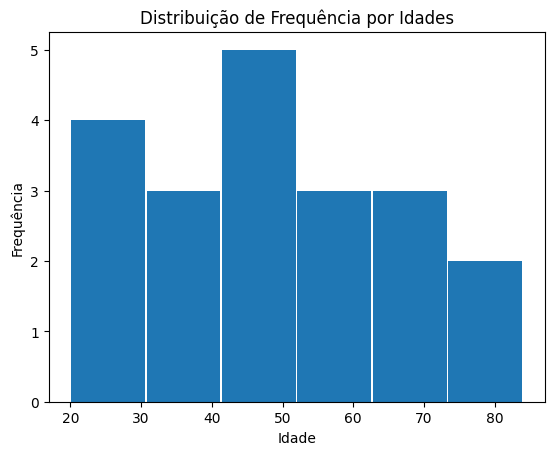

In [ ]:
plt.hist(idades,bins='auto', rwidth=0.98)
plt.title('Distribuição de Frequência por Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

É possível criar os gráficos diretamente, usando funções do dataframe que chamam as funções da bibliteca matplotlib.

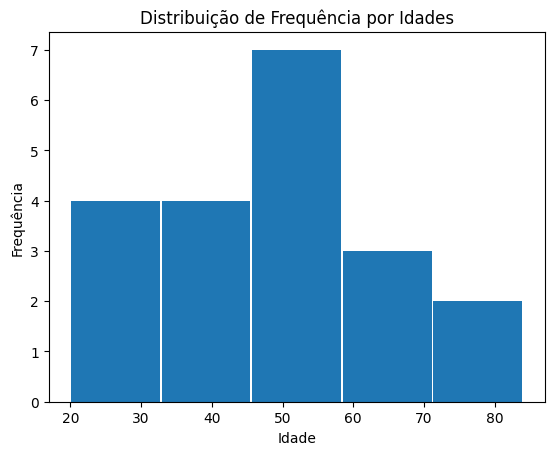

In [ ]:
df['Idade'].hist(bins=classes,rwidth=0.98)
plt.title('Distribuição de Frequência por Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

Criação do mesmo histograma utilizando a biblioteca seaborn. Diferentemente da função hist da biblioteca matplotlib, que recebe uma série, a função histplot recebe o dataframe completo e a indicação da coluna a ser utilizada.

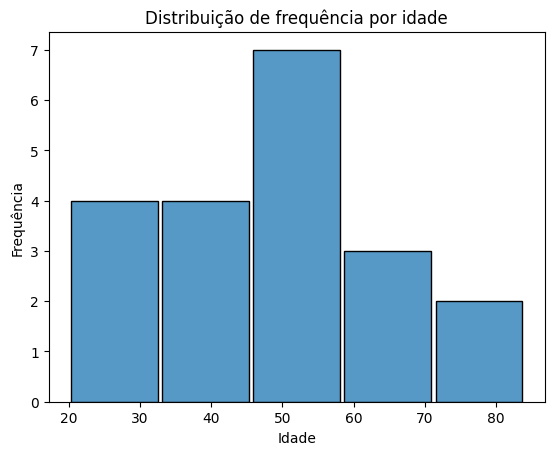

In [ ]:
sns.histplot(data=df, x='Idade', bins=classes, shrink=0.95)
plt.title('Distribuição de frequência por idade')
plt.ylabel('Frequência')
plt.show()

Criação de um histograma passado o intervalo entre as classes e não a quantidade de classes.

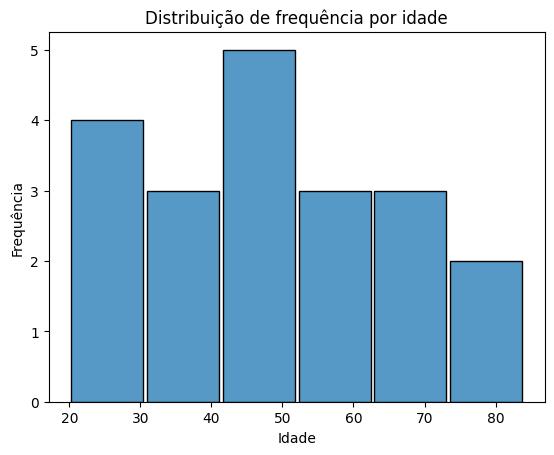

In [ ]:
sns.histplot(data=df, x="Idade", binwidth=10, shrink=0.95)
plt.title('Distribuição de frequência por idade')
plt.ylabel('Frequência')
plt.show()

Elaboração do Boxplot para a coluna idade usando as funções do dataframe. Esta função não é chamada por uma coluna específica do dataframe como no histograma de frequência e sim pelo dataframe como um todo. Para especificar qual coluna pretende-se criar o boxplot basta passar seu nome por parâmetro. A função foi implementada desta forma para possibilitar que mais de um atributo seja passado para gerar mais de um boxplot simultaneamente, como no segundo exemplo.

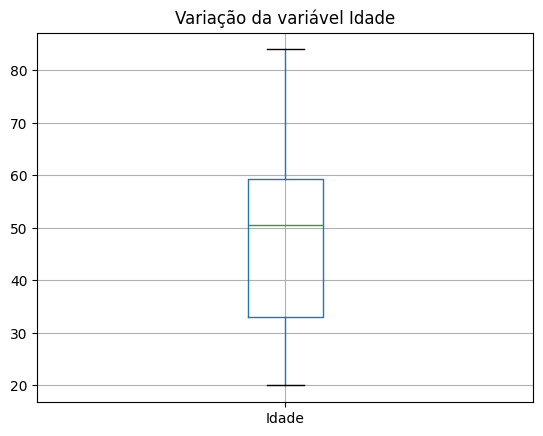

In [ ]:
df.boxplot('Idade')
plt.title('Variação da variável Idade')
plt.show()

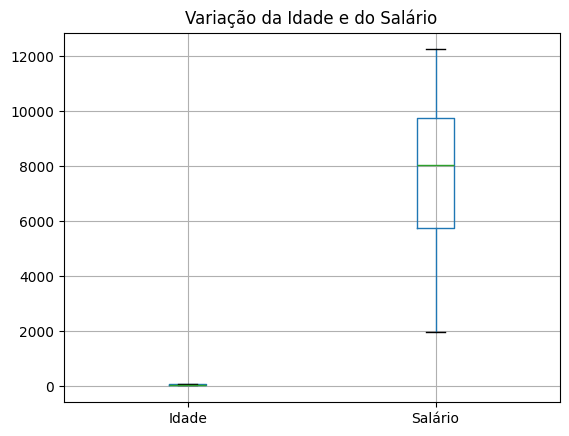

In [ ]:
df.boxplot(['Idade','Salário'])
plt.title('Variação da Idade e do Salário')
plt.show()

Criação de boxplot usando a biblioteca seaborn.

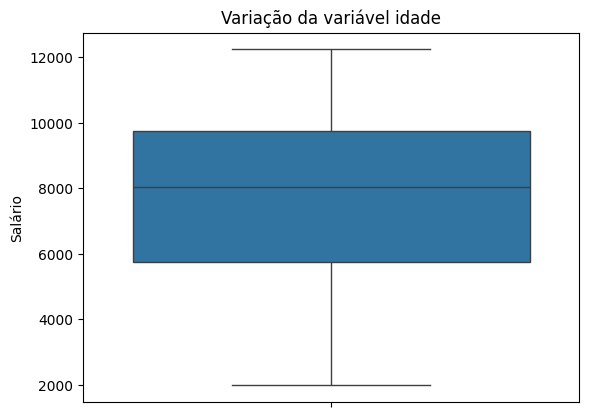

In [ ]:
sns.boxplot(data=df['Salário'])
plt.title('Variação da variável idade')
plt.show()

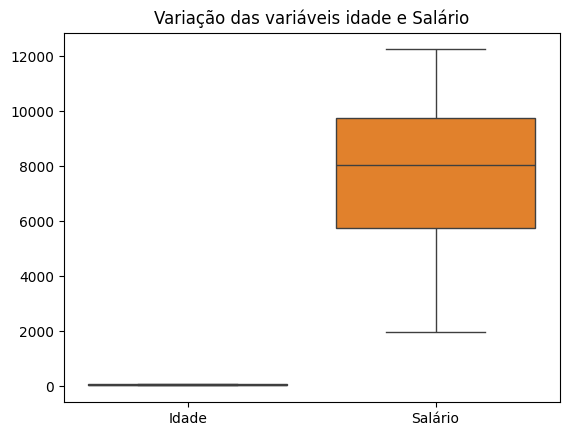

In [ ]:
sns.boxplot(data=df[['Idade','Salário']])
plt.title('Variação das variáveis idade e Salário')
plt.show()

Criação de um gráfico de violino para o atributo salário, usando a função violinplot da biblioteca matplotlib.

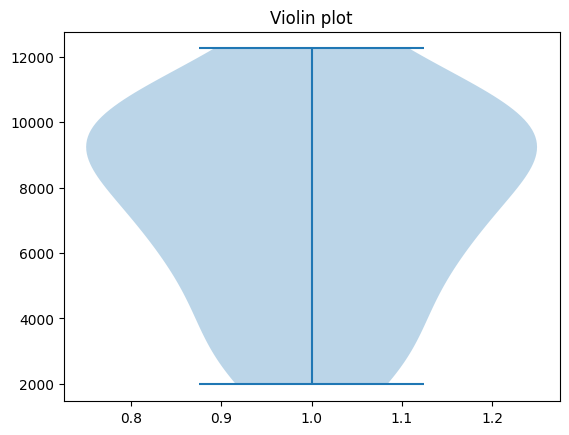

In [ ]:
plt.violinplot(df['Salário'])
plt.title('Violin plot')
plt.show()

Criação de um gráfico de violino para o atributo salário, usando a função violinplot da biblioteca seaborn.

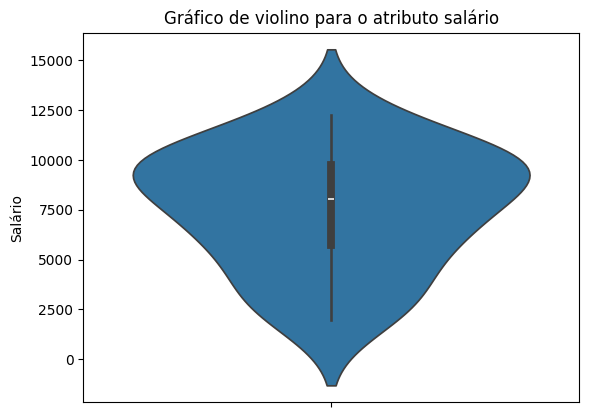

In [ ]:
sns.violinplot(y = "Salário",data = df, inner="box")
plt.title('Gráfico de violino para o atributo salário')
plt.show()

#**Parte 2 - Dados categóricos unidimensionais**

Criação de um gráfico de colunas por meio da função plot da biblioteca matplotlib, chamada diretamente pelo dataframe. Para usar esta função, primeiramente é preciso fazer a contagem da quantidade de pessoas de acordo com a função exercida, usando a função groupby.

In [ ]:
agrupadoFuncao = df.groupby(['Função']).size()

agrupadoFuncao

,0
Função,
Cientista de Dados,6
Programador Jr.,8
Programador Sr.,6


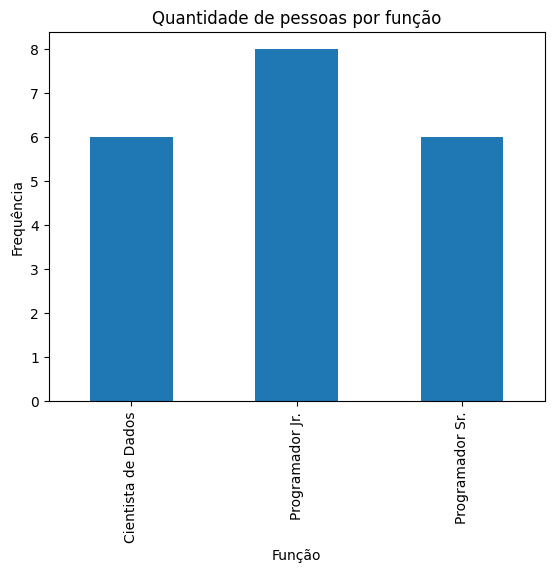

In [ ]:
agrupadoFuncao.plot.bar('Função')
plt.title('Quantidade de pessoas por função')
plt.xlabel('Função')
plt.ylabel('Frequência')
plt.show()

Criação de um gráfico de barras com o matplotlib. Basta substituir a função bar por barh.

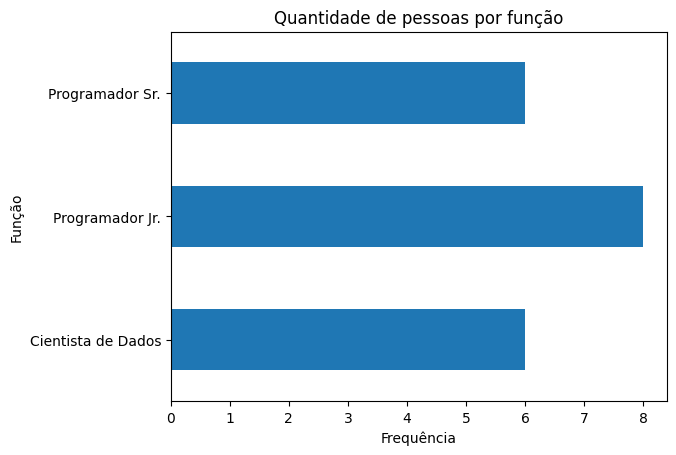

In [ ]:
agrupadoFuncao.plot.barh('Função')
plt.title('Quantidade de pessoas por função')
plt.xlabel('Frequência')
plt.ylabel('Função')
plt.show()

Criação de um gráfico de colunas por meio da função countplot da biblioteca seaborn. Não é necessário usar a função groupyby para fazer a contagem, pois a função countplot faz isto automaticamente.

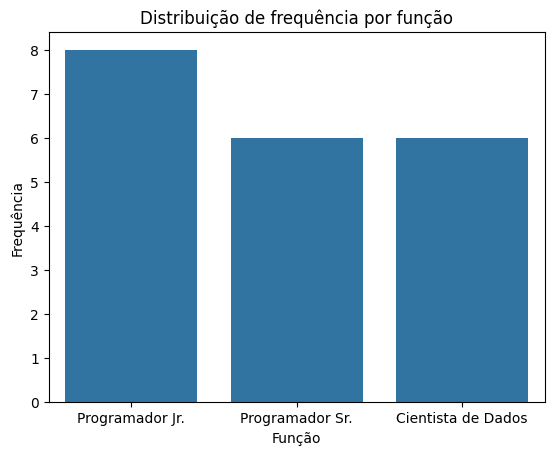

In [ ]:
sns.countplot(x='Função',data=df)
plt.title('Distribuição de frequência por função')
plt.ylabel('Frequência')
plt.show()

Para criar o gráfico de barras com o seaborn, basta passar os dados para o parâmetro y e não para o parâmetro x.

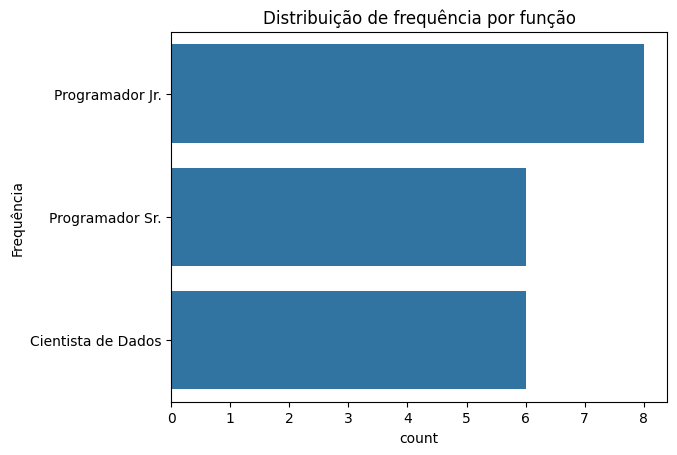

In [ ]:
sns.countplot(y='Função',data=df)
plt.title('Distribuição de frequência por função')
plt.ylabel('Frequência')
plt.show()

Criação de um gráfico de pizza usando a função pie da biblioteca matplotlib, chamada diretamente pelo dataframe. A biblioteca seaborn não possui uma função específica para criar gráficos de pizza.

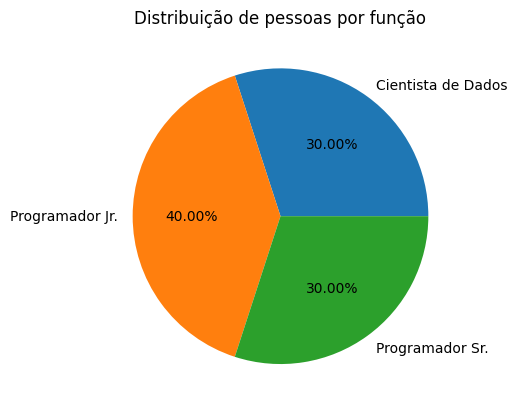

In [ ]:
agrupadoFuncao.plot.pie(x='Função',autopct="%.2f%%")
plt.title('Distribuição de pessoas por função')
plt.show()

Por padrão, a função pie apresenta o percentual de cada categoria como legenda. Uma função lambda pode ser usada para converter este valor em um valor absoluto.

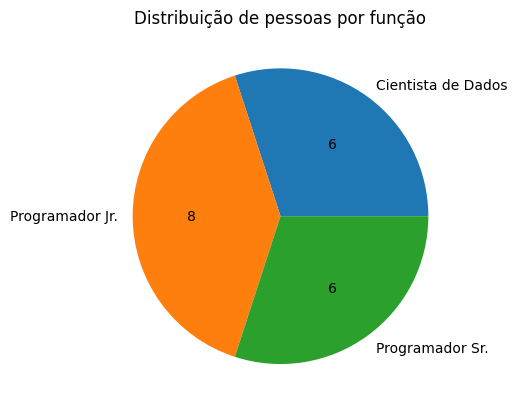

In [ ]:
agrupadoFuncao.plot.pie(x='Função',autopct=lambda x:f"{sum(agrupadoFuncao)*x/100:.0f}")
plt.title('Distribuição de pessoas por função')
plt.show()

#**Parte 3 - Dados numéricos multidimensionais**

Criação de um diagrama de dispersão relacionando idade com salário, com a função scatter do matplotlib, chamada diretamente do dataframe. Os parâmetros **s** e **c** indicam, respectivamente, o tamanho dos pontos e sua cor.

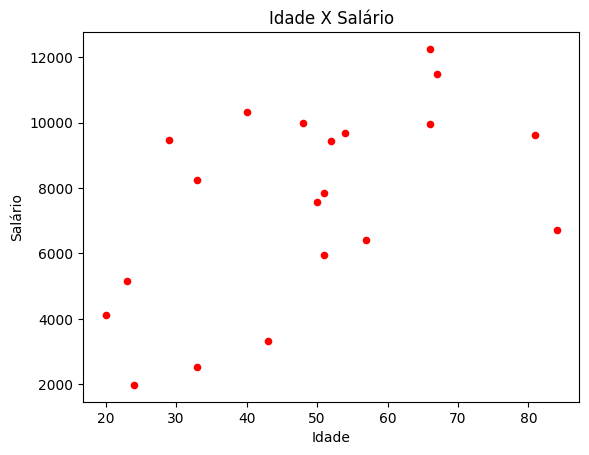

In [ ]:
df.plot.scatter('Idade','Salário', s = 20, c='red')
plt.title('Idade X Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()

Criação do diagrama de dispersão usando a função lmplot do seaborn. Por padrão esta função apresenta a equação de regressão entre as variáveis, para excluí-la basta setar o parâmetro fit_reg para False.

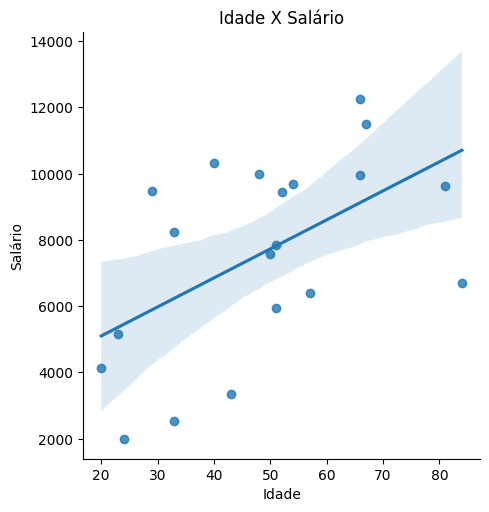

In [ ]:
sns.lmplot(data=df,x='Idade',y='Salário')
plt.title('Idade X Salário')
plt.show()

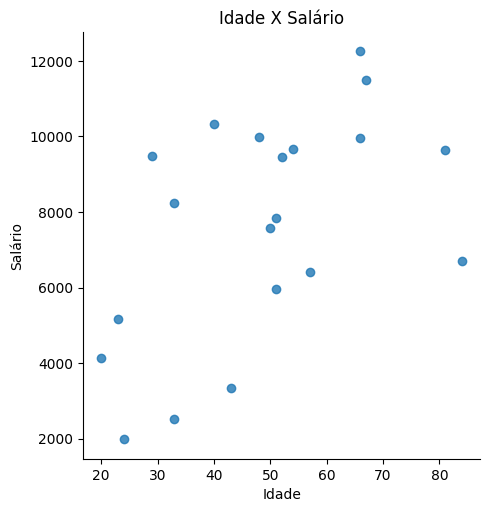

In [ ]:
sns.lmplot(data=df,x='Idade',y='Salário',fit_reg=False)
plt.title('Idade X Salário')
plt.show()

Criação de um mapa de calor usando a função heatmap da biblioteca seaborn. Para usar esta função, primeiramente deve-se calcular a correlação entre as variáveis numéricas do dataframe.

In [ ]:
corr = df.corr(numeric_only=True)
corr

,Idade,Salário
Idade,1.000000,0.539221
Salário,0.539221,1.000000


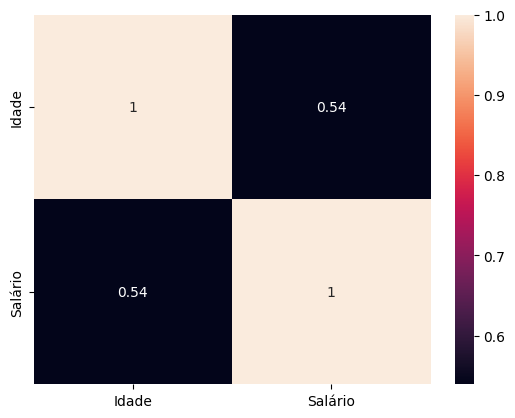

In [ ]:
sns.heatmap(corr,annot=True)
plt.show()

#**Parte 4 - Relação entre dados categóricos e dados numéricos**

Inserção no dataframe de um novo atributo, denominado Gênero, com os valores armazenados na lista.

In [ ]:
df['Gênero'] = ['M','F','M','F','M','F','M','F','M','F','M','F','M','F','M','F','M','F','M','F']

df

,Idade,Salário,Função,Gênero
0,20,4133.73,Programador Jr.,M
1,48,9982.69,Programador Sr.,F
2,51,5947.86,Programador Jr.,M
3,51,7851.60,Cientista de Dados,F
4,23,5162.67,Programador Sr.,M
5,40,10326.69,Programador Sr.,F
6,66,9961.18,Cientista de Dados,M
7,24,1982.21,Programador Jr.,F
8,52,9447.06,Cientista de Dados,M
9,50,7586.70,Programador Jr.,F


Criação de um gráfico de colunas com o salário médio de cada função usando a biblioteca matplotlib chamada diretamente do dataframe. Primeiramente deve ser feito o agrupamento dos dados do dataframe de acordo com a função e cálculo da média de cada grupo.

In [ ]:
agrupadoFuncao = df.groupby(['Função'])
salarioAgrupadoFuncao = agrupadoFuncao['Salário'].mean()
salarioAgrupadoFuncao

,Salário
Função,
Cientista de Dados,9564.175000
Programador Jr.,4829.761250
Programador Sr.,9352.866667


O código para criação do gráfico é o mesmo usado para criar o gráfico com a frequência de cada classe. A diferença está na hora de agrupar os dados, pois este dataframe armazena o salário médio em vez da quantidade de elementos de cada categoria.

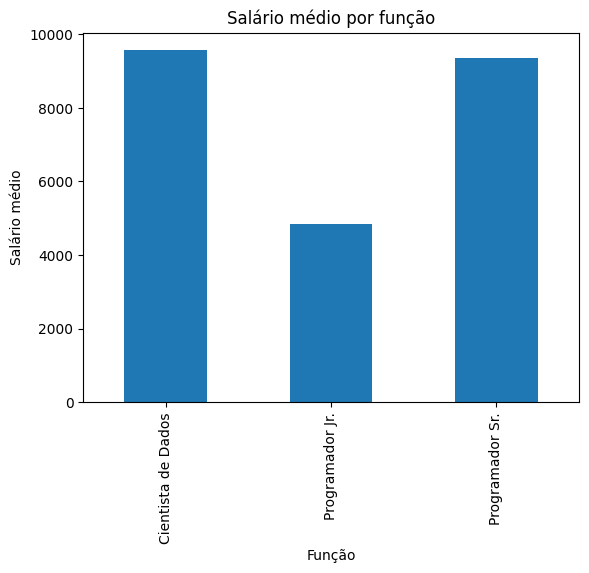

In [ ]:
salarioAgrupadoFuncao.plot.bar('Função')
plt.title('Salário médio por função')
plt.xlabel('Função')
plt.ylabel('Salário médio')
plt.show()

Criação do gráfico com o salário médio de cada função usando a função barplot da biblioteca seaborn. Novamente, não há necessidade de agrupar os dados pois isto é feito automaticamente pela função de criação do gráfico. Esta mesma função foi usada para criar um gráfico com as frequências de cada categoria do atributo função. Para que mostre o salário médio de cada categoria em vez da quantidade de observações bastou definir o valor do parâmetro y.

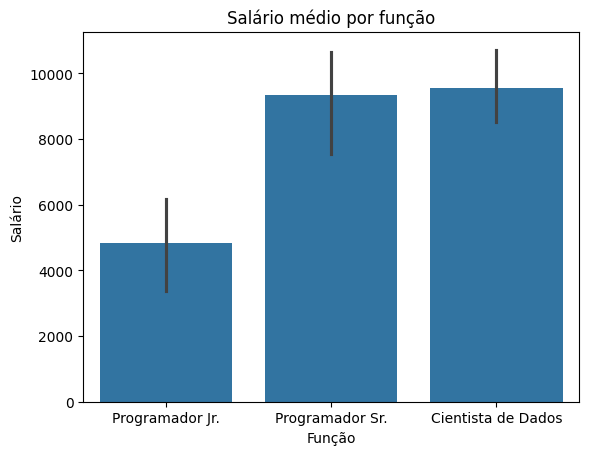

In [ ]:
sns.barplot(x='Função',y='Salário',data=df)
plt.title('Salário médio por função')
plt.show()

Para criar gráficos com os mesmos dados dos anteriores, mas com barras horizontais, basta usar a função barh no lugar de bar no caso da biblioteca matplotlib e inverter os parâmetros x e y na função barplot da biblioteca seaborn.

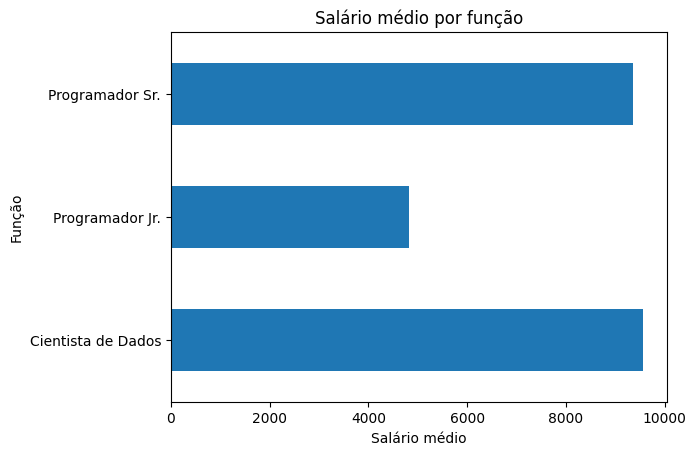

In [ ]:
salarioAgrupadoFuncao.plot.barh('Função')
plt.title('Salário médio por função')
plt.xlabel('Salário médio')
plt.ylabel('Função')
plt.show()

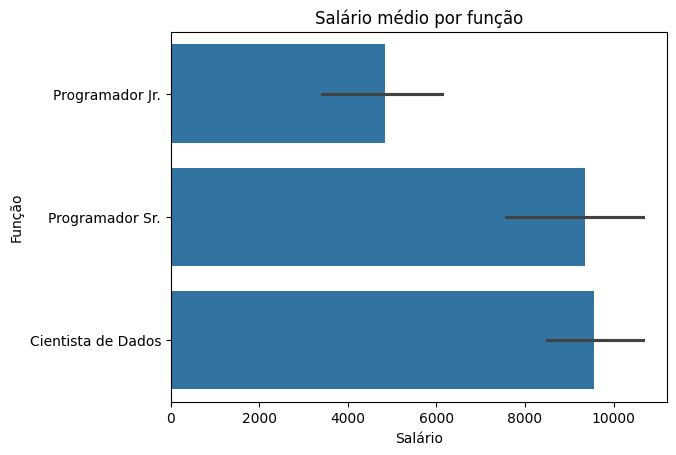

In [ ]:
sns.barplot(x='Salário',y='Função',data=df)
plt.title('Salário médio por função')
plt.show()

Gráficos de violino podem ser usados para apresentar a variabilidade dos dados dentro de cada categoria. O exemplo abaixo apresenta a criação de um gráfico de violino organizado em categorias usando a função violinplot da biblioteca seabor. A criação de um gráfico semelhante usando a função violinplot da biblioteca matplotlib é mais trabalhosa, porque vários gráficos devem ser criados e adicionados na mesma figura.

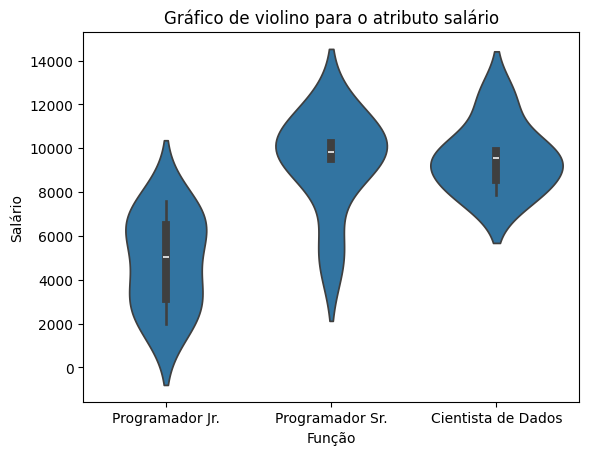

In [ ]:
sns.violinplot(x="Função",y = "Salário",data = df, inner="box")
plt.title('Gráfico de violino para o atributo salário')
plt.show()

Quando os dados são agrupados por mais de um atributo categórico, é possível criar gráficos de colunas ou barras agrupadas ou empilhadas.

In [ ]:
salarioAgrupadoFuncaoGenero = df.groupby(['Função','Gênero'])['Salário'].mean()
salarioAgrupadoFuncaoGenero

Função              Gênero
Cientista de Dados  F          7851.6000
                    M          9906.6900
Programador Jr.     F          3858.3675
                    M          5801.1550
Programador Sr.     F         10190.9060
                    M          5162.6700
Name: Salário, dtype: float64

Para indicar que um determinado atributo não deve ser apresentado em um dos eixos e sim como diferentes cores na legenda deve-se usar a função unstack.

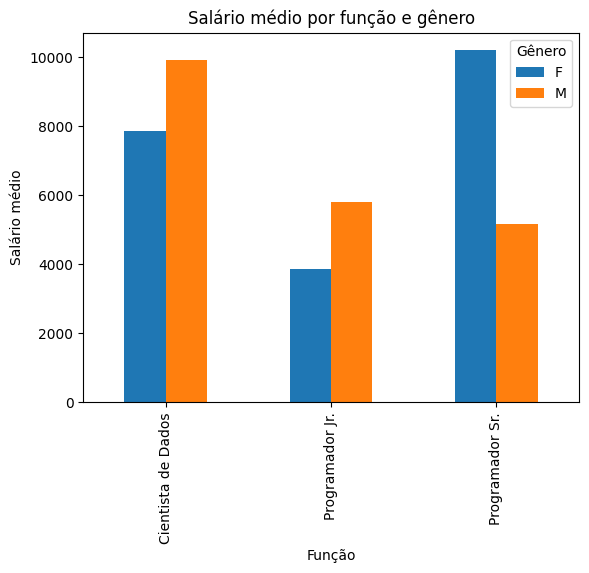

In [ ]:
salarioAgrupadoFuncaoGenero.unstack('Gênero').plot.bar()
plt.title('Salário médio por função e gênero')
plt.xlabel('Função')
plt.ylabel('Salário médio')
plt.show()

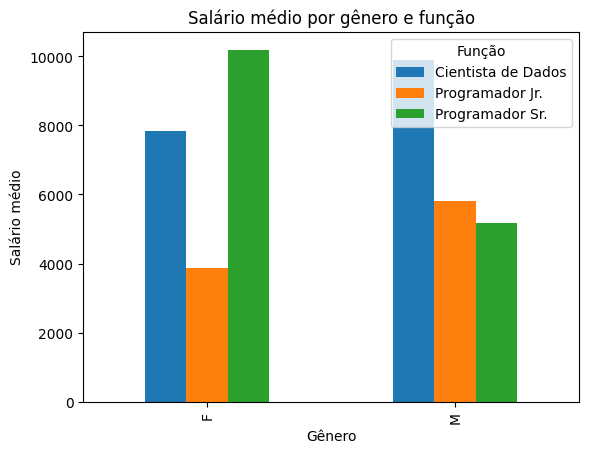

In [ ]:
salarioAgrupadoFuncaoGenero.unstack('Função').plot.bar()
plt.title('Salário médio por gênero e função')
plt.xlabel('Gênero')
plt.ylabel('Salário médio')
plt.show()

A criação deste tipo de gráfico usando a função barplot da biblioteca seaborn é mais simple pois, além de não precisar agrupar os dados, basta inverter os parâmetros para indicar quais atributos devem ser mostrados nos eixos e qual como cores na legenda (parâmetro hue).

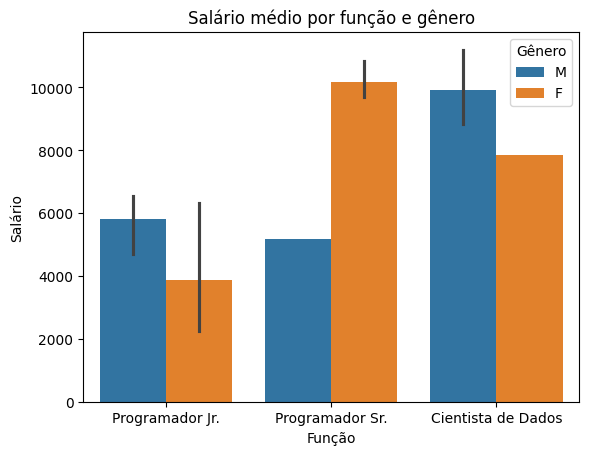

In [ ]:
sns.barplot(x='Função',y='Salário',data=df, hue='Gênero')
plt.title('Salário médio por função e gênero')
plt.show()

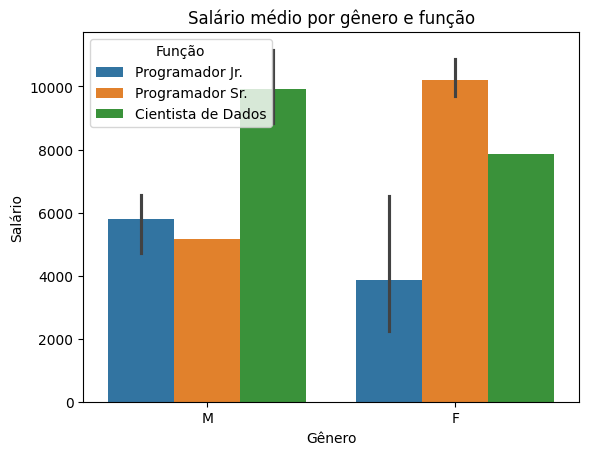

In [ ]:
sns.barplot(x='Gênero',y='Salário',data=df, hue='Função')
plt.title('Salário médio por gênero e função')
plt.show()

Para que o gráfico criado apresente as colunas empilhadas em vez de agrupadas, basta definir o parâmetro stacked como True. Neste caso é mais simples criar o gráfico chamando a função do dataframe do que usar a biblioteca seaborn que não possui uma forma automática para gerar o gráfico com as barras empilhadas.

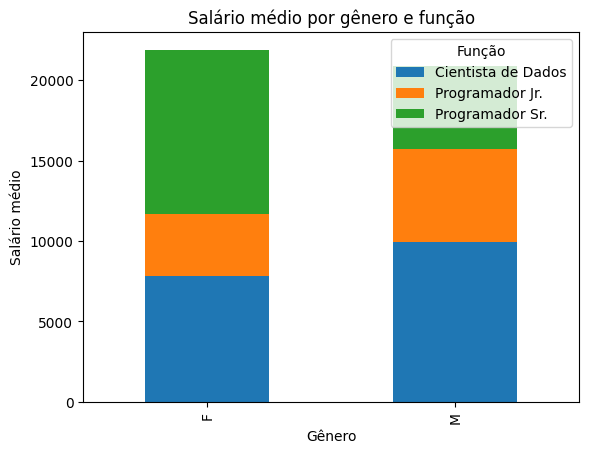

In [ ]:
salarioAgrupadoFuncaoGenero.unstack('Função').plot.bar(stacked=True)
plt.title('Salário médio por gênero e função')
plt.xlabel('Gênero')
plt.ylabel('Salário médio')
plt.show()

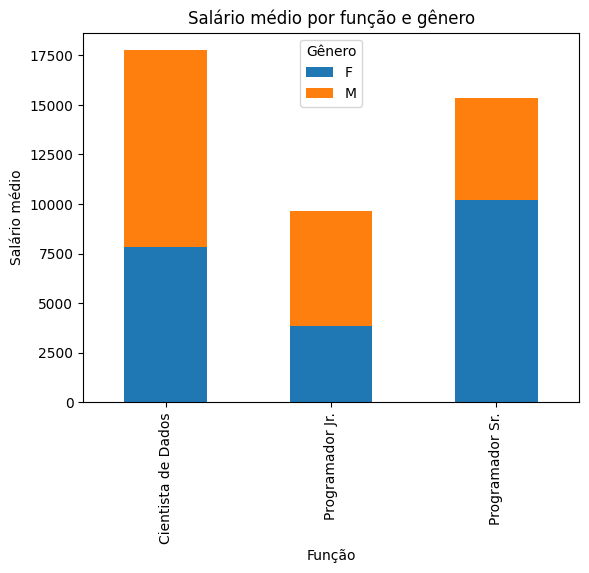

In [ ]:
salarioAgrupadoFuncaoGenero.unstack('Gênero').plot.bar(stacked=True)
plt.title('Salário médio por função e gênero')
plt.xlabel('Função')
plt.ylabel('Salário médio')
plt.show()